In [65]:
old_data <- read.csv(file = '/home/colton/PycharmProjects/soundscapes/indices_with_clusters.csv')
old_data$acoustic_evenness....double..<-NULL
old_data$spectral_entropy....double..<-NULL
head(old_data)

,Site,Date....as.Date.character....format.....Y..m..d..,Time....character..,Name....character..,File_Start_Time....character..,File_End_Time....character..,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....integer..,ndsi....double..,cluster..nine..clusters,cluster..fifteen..clusters
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
1,Audubon_Society,2019-04-18,11:12:36,Audubon_Society_S4A07275_20190418_111236.wav,0,5,101.0132,0.09830943,0.9724801,0.7918867,1.811299,196.6844,1,0.4799106,4,5
2,Audubon_Society,2019-04-18,11:17:36,Audubon_Society_S4A07275_20190418_111236.wav,5,10,113.4433,0.11335600,0.9730184,0.7862678,1.767159,201.1060,0,0.8579672,4,5
3,Audubon_Society,2019-04-18,11:22:36,Audubon_Society_S4A07275_20190418_111236.wav,10,15,125.1966,0.20363086,0.9820155,0.7802612,1.744127,196.8785,0,0.5911719,4,5
4,Audubon_Society,2019-04-18,11:27:36,Audubon_Society_S4A07275_20190418_111236.wav,15,20,147.6329,0.16143239,0.9848378,0.7636971,1.768792,211.8268,0,0.8497890,4,7
5,Audubon_Society,2019-04-18,11:32:36,Audubon_Society_S4A07275_20190418_111236.wav,20,25,120.6462,0.18025170,0.9826372,0.7834478,1.733753,199.5438,1,0.5483259,4,5
6,Audubon_Society,2019-04-18,11:37:36,Audubon_Society_S4A07275_20190418_111236.wav,25,30,150.6320,0.09876261,0.9809657,0.7845571,1.580442,191.5337,0,0.7192530,1,7


In [38]:
new_data <- read.csv(file = '/media/colton/My Passport/jake_lockdown.csv')
new_data$acoustic_evenness....double..<-NULL
head(new_data)

[1] 6.580808

,Site,Date....as.Date.character....format.....Y..m..d..,Time....character..,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....double..,ndsi....double..
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,S4A07341_20200425_150748.wav,2020-04-25,15:7:48,123.0899,0.04881321,0.9761470,0.5120989,0.035894,161.0538,0,-0.03784386
2,S4A07341_20200425_150748.wav,2020-04-25,15:12:48,124.3073,0.05004883,0.9679706,0.4704897,0.065063,162.4347,0,0.03136271
3,S4A07341_20200425_150748.wav,2020-04-25,15:17:48,123.1986,0.05277015,0.9729215,0.4727955,0.012820,157.0606,0,-0.31650481
4,S4A07341_20200425_150748.wav,2020-04-25,15:22:48,125.4803,0.05084848,0.9738461,0.5251948,0.058479,159.0372,0,-0.21719377
5,S4A07341_20200425_150748.wav,2020-04-25,15:27:48,118.6231,0.05901464,0.9584576,0.4379184,0.000000,160.1833,0,-0.15457309
6,S4A07341_20200425_150748.wav,2020-04-25,15:32:48,120.6170,0.04119720,0.9886739,0.5147756,0.056907,159.5186,0,-0.25409337


In [36]:


euclidean <- function(cluster,center,clust_num) {
    square_dist <- 0
    for (index in 7:14) {
        square_dist <- square_dist + (as.numeric(as.character(cluster[,6+index]))-as.numeric(as.character(center[clust_num,index])))^2
    }
    return(sqrt(square_dist))
}

In [69]:
centers <- data.frame(matrix(ncol = 9, nrow = 9))
colnames(centers)<-c("center",colnames(new_data)[4:11])
for (i in 1:9) {
    cluster <- old_data[old_data$cluster..nine..clusters == i, ]
    centers[i,]<-c(i,apply(cluster[7:14],2,mean))
    }
head(centers,10)

,center,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....double..,ndsi....double..
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,146.92381,0.06215286,0.9899660,0.5859528,1.1714328,177.3252,0.16655865,0.608830104
2,2,98.40256,0.15122680,0.9817562,0.8699550,1.9018426,159.2868,6.58080808,0.917891416
3,3,135.09586,0.08360114,0.9852842,0.5396897,0.3282398,158.3120,0.12583942,-0.398056168
4,4,107.09790,0.09103349,0.9740151,0.7777437,1.7866489,188.4155,0.29965557,0.878468650
5,5,141.96820,0.06535979,0.9889716,0.6340137,1.1280860,155.4985,0.47260274,0.728979000
6,6,100.00878,0.04483946,0.9925833,0.3855361,0.2360516,155.4497,0.09954158,0.201924834
7,7,100.84677,0.12352031,0.9814412,0.7280178,1.4169490,152.4145,0.61740891,0.944130536
8,8,114.32335,0.57595658,0.9844184,0.3577390,0.2623536,186.6985,0.02230483,0.001227937
9,9,123.27200,0.11173677,0.9697183,0.3967080,0.1336873,168.1448,0.02350136,0.027020730


In [73]:
old_data$distance_from_center<-NA
for (i in 1:9){
    for (j in 1:nrow(old_data)){
        if (old_data[j,"cluster..nine..clusters"]==i){
            d<-centers[i,2:9]- old_data[j,7:14]
            old_data[j,"distance_from_center"]<-sqrt(sum(d^2))
            if (is.na(sqrt(sum(d^2)))){
                print(cluster)
            }
        }
        
    }
    
}
#head(old_data)

In [76]:
new_data$proximity_percentage<- NA
new_data$hypothetical_cluster<-NA
for (j in 1:nrow(new_data)){
    best_cluster<- 1
    best_d <- 1000000
    proximity_percentage <- 0
    for(i in 1:9){
        d<- centers[i,2:9]- new_data[j,4:11]
        dist_to_center <- sqrt(sum(d^2))
        cluster <- old_data[old_data$cluster..nine..clusters == i, ]
        num_farther<- 0
        for (k in 1:nrow(cluster)){
            if (dist_to_center > cluster[k,"distance_from_center"]){
                num_farther<- num_farther+1
            }
            if (dist_to_center < best_d) {
                best_d <- dist_to_center
                best_cluster<- i
            }
        }
        cluster_proximity<- num_farther/nrow(cluster)
    }
    if (cluster_proximity > proximity_percentage){
        proximity_percentage <- cluster_proximity
    }
    new_data[j,"proximity_percentage"]<-proximity_percentage
    new_data[j,"hypothetical_cluster"]<-best_cluster
}
head(new_data)
write.csv(new_data,"jake_data_proximity_analysis.csv", row.names = FALSE)

,Site,Date....as.Date.character....format.....Y..m..d..,Time....character..,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....double..,ndsi....double..,proximity_percentage,hypothetical_cluster
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,S4A07341_20200425_150748.wav,2020-04-25,15:7:48,123.0899,0.04881321,0.9761470,0.5120989,0.035894,161.0538,0,-0.03784386,0.1597411,9
2,S4A07341_20200425_150748.wav,2020-04-25,15:12:48,124.3073,0.05004883,0.9679706,0.4704897,0.065063,162.4347,0,0.03136271,0.1035422,9
3,S4A07341_20200425_150748.wav,2020-04-25,15:17:48,123.1986,0.05277015,0.9729215,0.4727955,0.012820,157.0606,0,-0.31650481,0.3559264,9
4,S4A07341_20200425_150748.wav,2020-04-25,15:22:48,125.4803,0.05084848,0.9738461,0.5251948,0.058479,159.0372,0,-0.21719377,0.2639646,9
5,S4A07341_20200425_150748.wav,2020-04-25,15:27:48,118.6231,0.05901464,0.9584576,0.4379184,0.000000,160.1833,0,-0.15457309,0.2540872,9
6,S4A07341_20200425_150748.wav,2020-04-25,15:32:48,120.6170,0.04119720,0.9886739,0.5147756,0.056907,159.5186,0,-0.25409337,0.2476158,9


In [77]:
analysis_data <- read.csv(file = "jake_data_proximity_analysis.csv")
head(analysis_data)

,Site,Date....as.Date.character....format.....Y..m..d..,Time....character..,bioacoustic....double..,amplitude....double..,temporal_entropy....double..,acoustic_entropy....double..,acoustic_diversity....double..,acoustic_complexity....double..,nrows....double..,ndsi....double..,proximity_percentage,hypothetical_cluster
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,S4A07341_20200425_150748.wav,2020-04-25,15:7:48,123.0899,0.04881321,0.9761470,0.5120989,0.035894,161.0538,0,-0.03784386,0.1597411,9
2,S4A07341_20200425_150748.wav,2020-04-25,15:12:48,124.3073,0.05004883,0.9679706,0.4704897,0.065063,162.4347,0,0.03136271,0.1035422,9
3,S4A07341_20200425_150748.wav,2020-04-25,15:17:48,123.1986,0.05277015,0.9729215,0.4727955,0.012820,157.0606,0,-0.31650481,0.3559264,9
4,S4A07341_20200425_150748.wav,2020-04-25,15:22:48,125.4803,0.05084848,0.9738461,0.5251948,0.058479,159.0372,0,-0.21719377,0.2639646,9
5,S4A07341_20200425_150748.wav,2020-04-25,15:27:48,118.6231,0.05901464,0.9584576,0.4379184,0.000000,160.1833,0,-0.15457309,0.2540872,9
6,S4A07341_20200425_150748.wav,2020-04-25,15:32:48,120.6170,0.04119720,0.9886739,0.5147756,0.056907,159.5186,0,-0.25409337,0.2476158,9


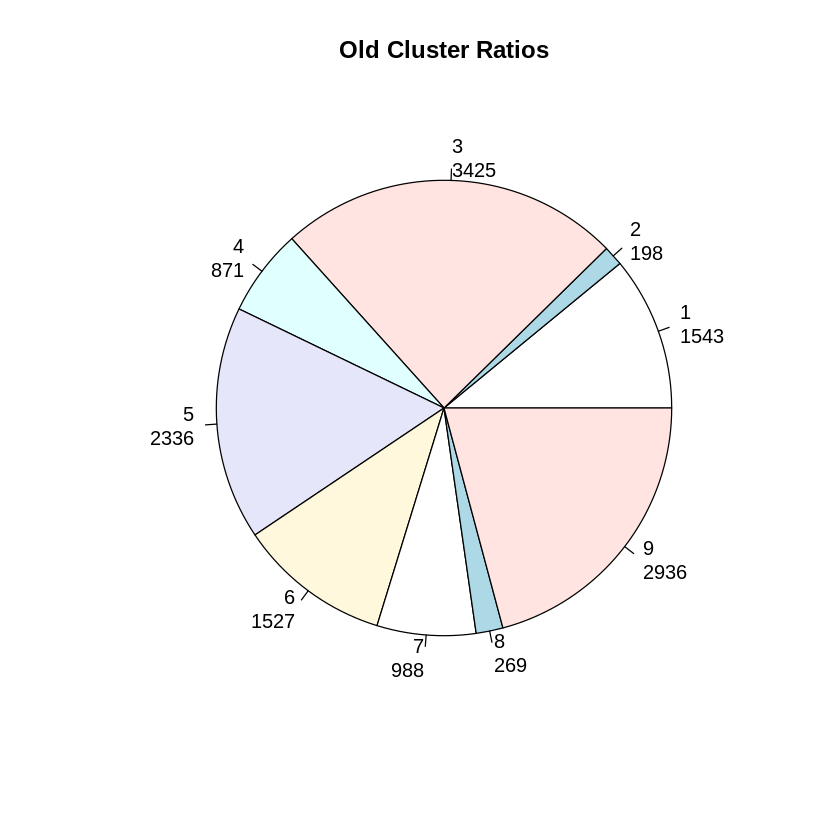

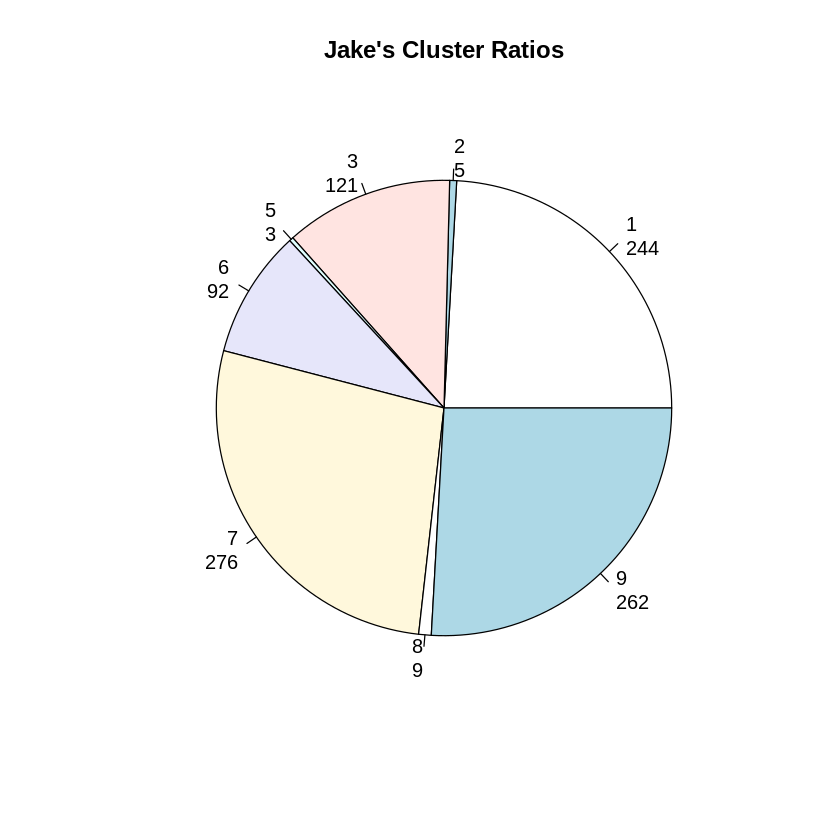

In [81]:
oldtable<-table(old_data$cluster..nine..clusters)
lbls <- paste(names(oldtable), "\n", oldtable, sep="")
pie(oldtable, labels = lbls,
   main="Old Cluster Ratios") 
newtable<-table(analysis_data$hypothetical_cluster)
lbls <- paste(names(newtable), "\n", newtable, sep="")
pie(newtable, labels = lbls,
   main="Jake's Cluster Ratios") 

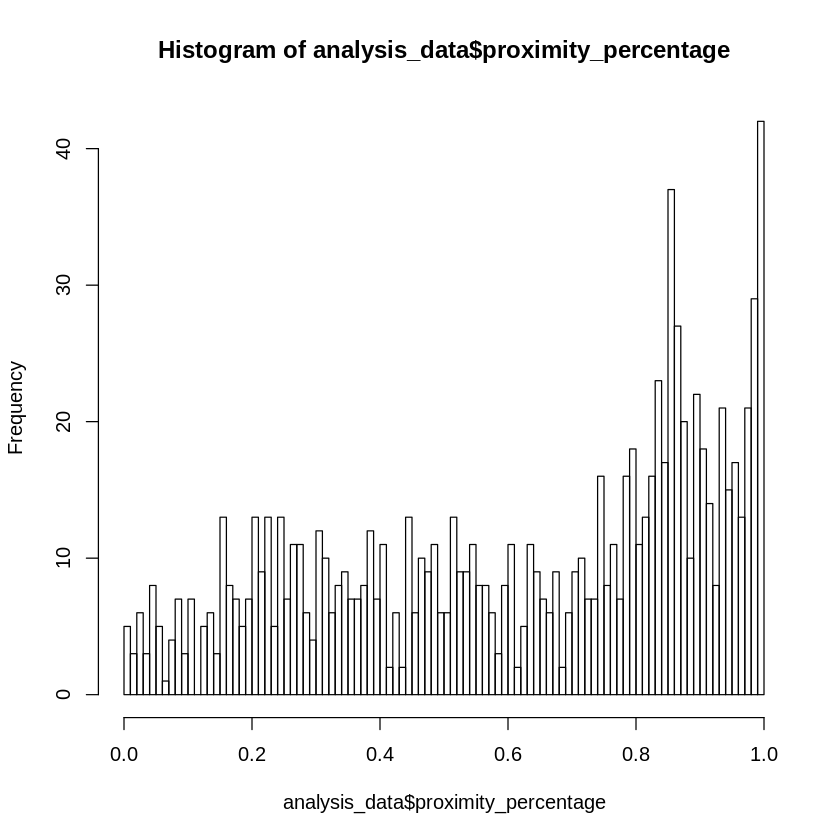

In [84]:
hist(analysis_data$proximity_percentage,breaks=100)